In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/penguins.csv')  # Update path if needed



In [ ]:

# Convert selected columns to NumPy arrays
bill_length = df_clean['bill_length_mm'].values
flipper_length = df_clean['flipper_length_mm'].values

print("Bill Length (NumPy):", bill_length[:5])
print("Flipper Length (NumPy):", flipper_length[:5])



Bill Length (NumPy): [39.1 39.5 40.3 36.7 39.3]
Flipper Length (NumPy): [181. 186. 195. 193. 190.]


In [ ]:
print("Mean Bill Length:", np.mean(bill_length))
print("Max Flipper Length:", np.max(flipper_length))
print("Min Flipper Length:", np.min(flipper_length))
print("Standard Deviation (Flipper):", np.std(flipper_length))



Mean Bill Length: 43.9927927927928
Max Flipper Length: 231.0
Min Flipper Length: 172.0
Standard Deviation (Flipper): 13.994704772576716


In [ ]:
# Find penguins with flipper length > 200 mm
long_flippers = flipper_length > 200
print("Number of penguins with long flippers:", np.sum(long_flippers))



Number of penguins with long flippers: 144


In [ ]:
# Add 10 mm to all bill lengths
bill_length_plus10 = bill_length + 10
print("Bill length after adding 10 mm:", bill_length_plus10[:5])


Bill length after adding 10 mm: [49.1 49.5 50.3 46.7 49.3]


In [ ]:
# Create a 2D NumPy array from two features
features_np = np.column_stack((bill_length, flipper_length))

print("Shape of combined array:", features_np.shape)
print("First 5 rows:\n", features_np[:5])


Shape of combined array: (333, 2)
First 5 rows:
 [[ 39.1 181. ]
 [ 39.5 186. ]
 [ 40.3 195. ]
 [ 36.7 193. ]
 [ 39.3 190. ]]


In [ ]:
# Transpose
print("Transposed shape:", features_np.T.shape)

# Dot product of matrix with its transpose
dot_product = np.dot(features_np.T, features_np)
print("Dot Product Matrix:\n", dot_product)


Transposed shape: (2, 333)
Dot Product Matrix:
 [[  654405.72  2960705.  ]
 [ 2960705.   13514330.  ]]


In [ ]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

print("\nMissing Values:\n", df.isna().sum())

print("\nDescriptive Statistics:\n", df.describe(include='all'))


Shape: (344, 9)

Columns: ['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None

Missing Values:
 id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_

In [ ]:
# Drop rows with missing values
df_clean = df.dropna()
print("Missing values after cleaning:\n", df_clean.isna().sum())


Missing values after cleaning:
 id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


              id                                                              \
           count        mean        std    min     25%    50%     75%    max   
species                                                                        
Adelie     146.0   78.000000  43.009863    0.0   41.25   78.5  114.75  151.0   
Chinstrap   68.0  309.500000  19.773720  276.0  292.75  309.5  326.25  343.0   
Gentoo     119.0  212.462185  35.580367  152.0  182.50  212.0  242.50  275.0   

          bill_length_mm             ... body_mass_g           year  \
                   count       mean  ...         75%     max  count   
species                              ...                              
Adelie             146.0  38.823973  ...      4000.0  4775.0  146.0   
Chinstrap           68.0  48.833824  ...      3950.0  4800.0   68.0   
Gentoo             119.0  47.568067  ...      5500.0  6300.0  119.0   

                                                                          
                 

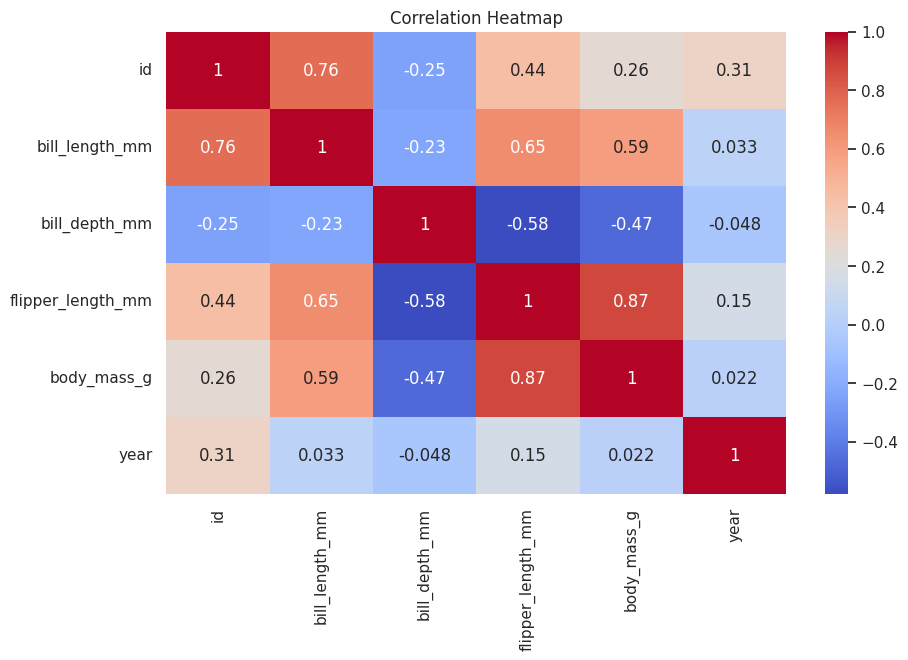

In [ ]:
# Summary stats by species
print(df_clean.groupby('species').describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


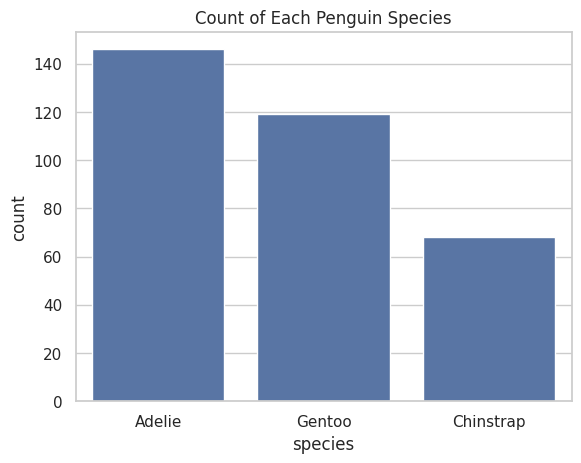

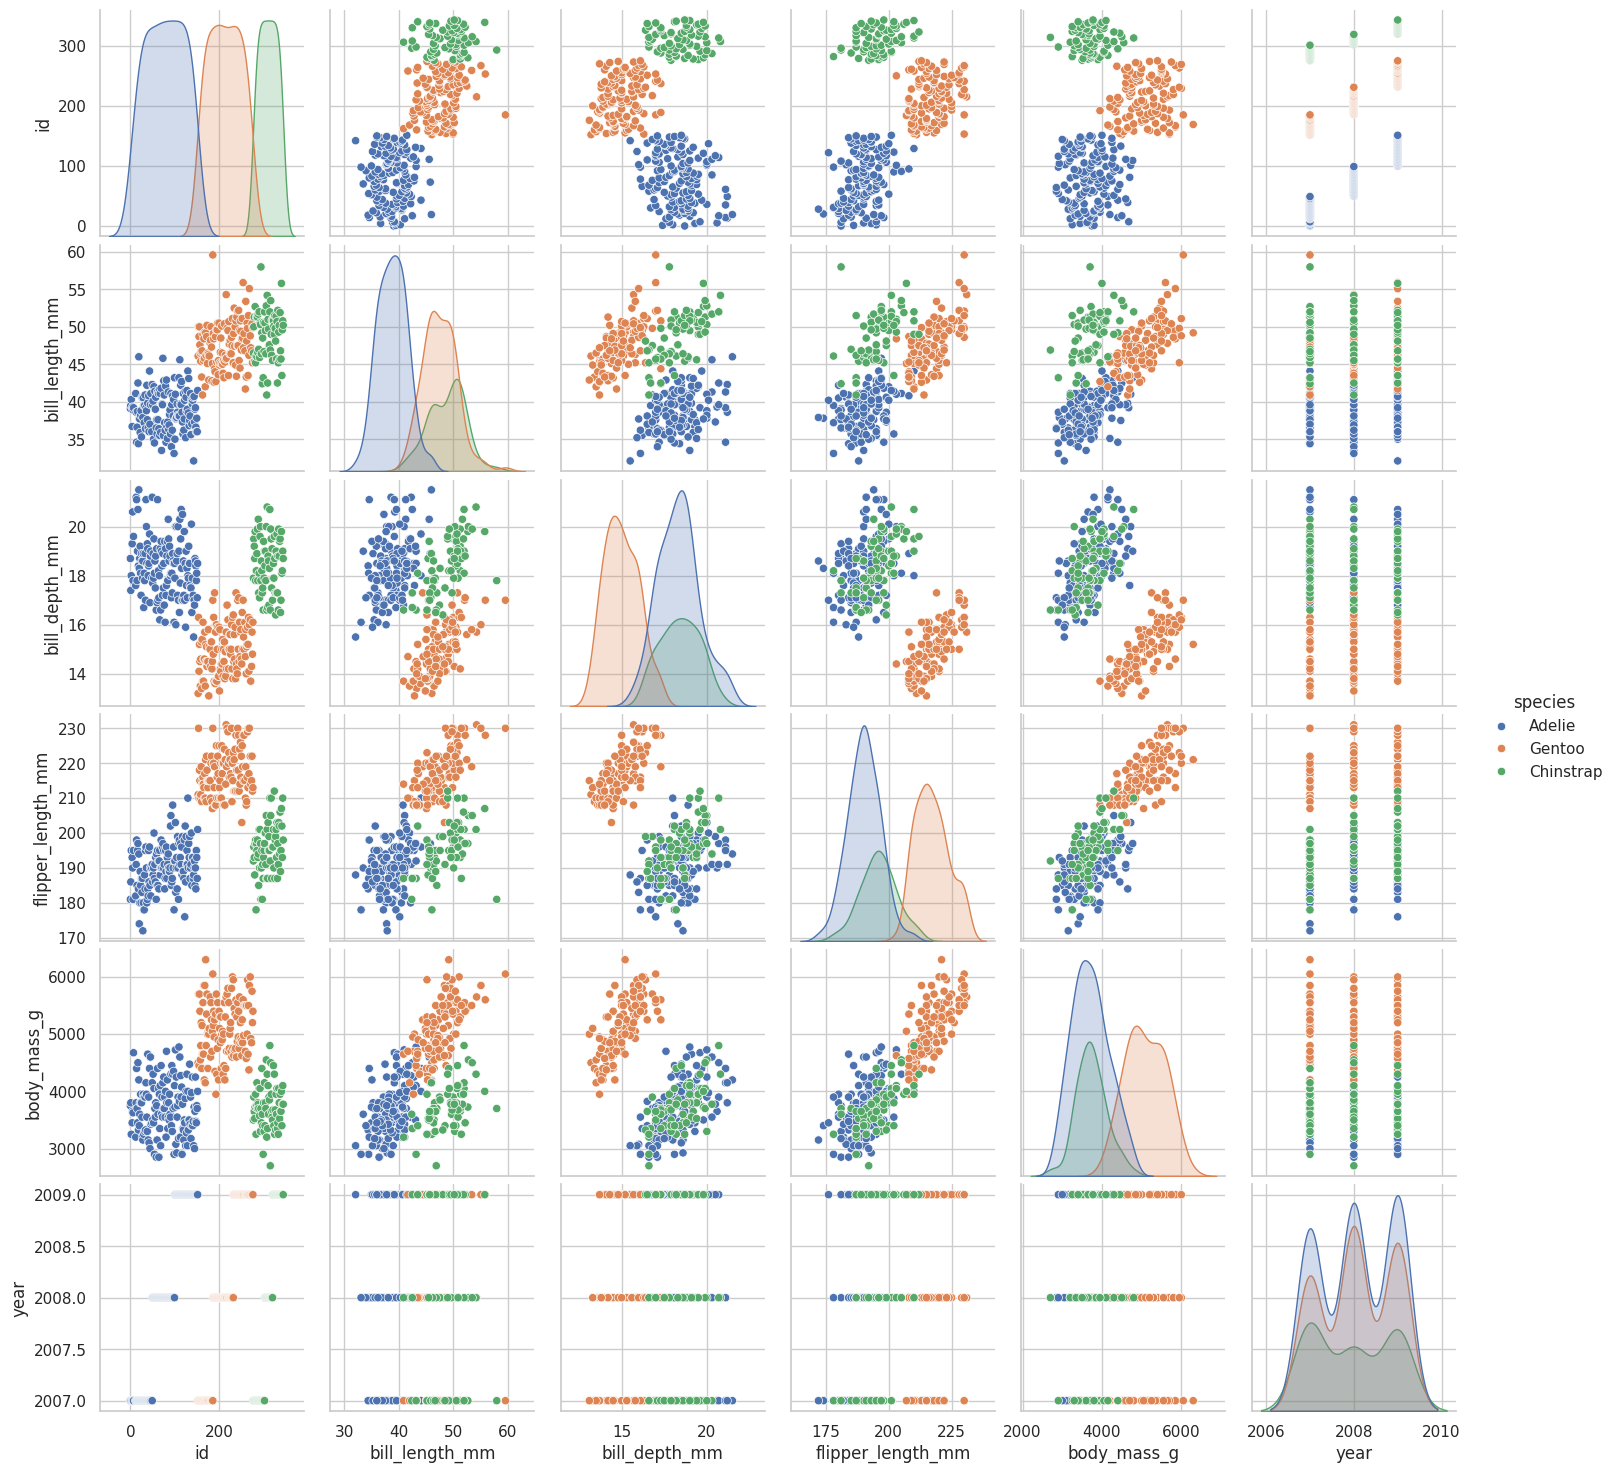

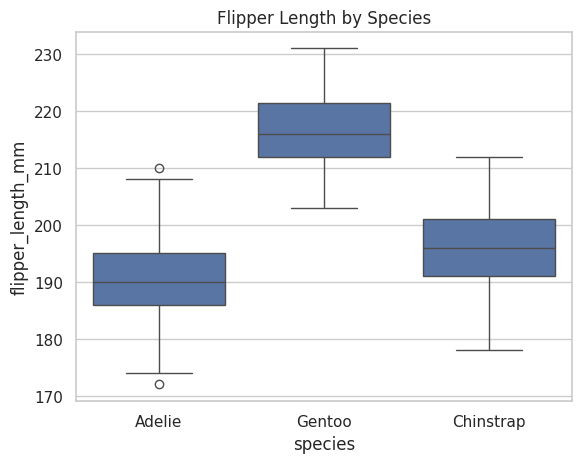

In [ ]:
# Countplot
sns.countplot(x='species', data=df_clean)
plt.title("Count of Each Penguin Species")
plt.show()

# Pairplot
sns.pairplot(df_clean, hue='species')
plt.show()

# Boxplot
sns.boxplot(x='species', y='flipper_length_mm', data=df_clean)
plt.title("Flipper Length by Species")
plt.show()


In [ ]:
# Convert columns to NumPy arrays
bill_length = df_clean['bill_length_mm'].values
flipper_length = df_clean['flipper_length_mm'].values

# Basic statistics
print("Mean Bill Length:", np.mean(bill_length))
print("Max Flipper Length:", np.max(flipper_length))
print("Min Flipper Length:", np.min(flipper_length))
print("Standard Deviation (Flipper):", np.std(flipper_length))

# Filtering
long_flippers = flipper_length > 200
print("Penguins with flipper length > 200mm:", np.sum(long_flippers))

# Vectorized operation
bill_length_plus10 = bill_length + 10
print("First 5 bill lengths +10mm:", bill_length_plus10[:5])

# Combine into 2D array
features_np = np.column_stack((bill_length, flipper_length))
print("Shape of features:", features_np.shape)

# Transpose
print("Transposed shape:", features_np.T.shape)

# Dot product
dot_product = np.dot(features_np.T, features_np)
print("Dot Product Matrix:\n", dot_product)


Mean Bill Length: 43.9927927927928
Max Flipper Length: 231.0
Min Flipper Length: 172.0
Standard Deviation (Flipper): 13.994704772576716
Penguins with flipper length > 200mm: 144
First 5 bill lengths +10mm: [49.1 49.5 50.3 46.7 49.3]
Shape of features: (333, 2)
Transposed shape: (2, 333)
Dot Product Matrix:
 [[  654405.72  2960705.  ]
 [ 2960705.   13514330.  ]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'species'
le = LabelEncoder()
df_clean = df_clean.copy()  # Ensure we're working on a fresh copy to avoid warnings
df_clean.loc[:, 'species_encoded'] = le.fit_transform(df_clean['species'])

# One-hot encode other categorical columns
df_model = pd.get_dummies(df_clean.drop('species', axis=1), drop_first=True)

# View the first few rows of the processed data
df_model.head()


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_encoded,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,0,False,True,True
1,1,39.5,17.4,186.0,3800.0,2007,0,False,True,False
2,2,40.3,18.0,195.0,3250.0,2007,0,False,True,False
4,4,36.7,19.3,193.0,3450.0,2007,0,False,True,False
5,5,39.3,20.6,190.0,3650.0,2007,0,False,True,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and target
X = df_model.drop('species_encoded', axis=1)
y = df_model['species_encoded']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Output model accuracy
accuracy = model.score(X_test, y_test)
print(f"✅ Model Training Completed\n🔍 Accuracy on Test Set: {accuracy * 100:.2f}%")



✅ Model Training Completed
🔍 Accuracy on Test Set: 100.00%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

